In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [121]:
df = pd.read_csv('prices_bitcoin.csv')

In [122]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,"Apr 25, 2018","9,701.03","9,745.32","8,799.84","8,845.74","11,083,100,000","164,893,000,000"
1,1,"Apr 24, 2018","8,934.34","9,732.61","8,927.83","9,697.50","10,678,800,000","151,844,000,000"
2,2,"Apr 23, 2018","8,794.39","8,958.55","8,788.81","8,930.88","6,925,190,000","149,448,000,000"
3,3,"Apr 22, 2018","8,925.06","9,001.64","8,779.61","8,802.46","6,629,900,000","151,651,000,000"
4,4,"Apr 21, 2018","8,848.79","8,997.57","8,652.15","8,895.58","7,548,550,000","150,337,000,000"


In [123]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [124]:
df['Date']= pd.to_datetime(df['Date'])

In [125]:
df.sort_values(by='Date',inplace=True)
df.reset_index(drop=True,inplace=True)

In [126]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [127]:
%matplotlib inline

In [128]:
import datetime as dt
df_test1 = df[(df['Date']>dt.datetime(2014,12,31))&(df['Date']<dt.datetime(2018,1,1))]
df_test1.reset_index(drop=True,inplace=True)

In [129]:
df_test1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2015-01-01,320.44,320.44,314.00,314.25,"8,036,550","4,380,820,000"
1,2015-01-02,314.08,315.84,313.57,315.03,"7,860,650","4,295,210,000"
2,2015-01-03,314.85,315.15,281.08,281.08,"33,054,400","4,307,010,000"
3,2015-01-04,281.15,287.23,257.61,264.20,"55,629,100","3,847,150,000"
4,2015-01-05,265.08,278.34,265.08,274.47,"43,962,800","3,628,490,000"


In [130]:
df_test1['Volume']=df_test1['Volume'].apply(lambda x: float(x.replace(',','')))
df_test1['Close']=df_test1['Close'].apply(lambda x: float(x.replace(',','')))
df_test1['Market Cap']=df_test1['Market Cap'].apply(lambda x: float(x.replace(',','')))

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

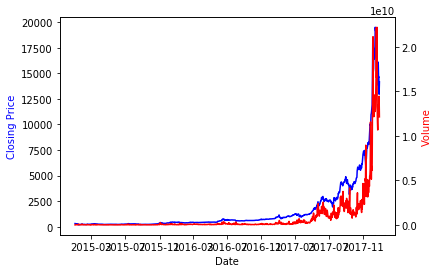

In [131]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price',color='blue')
ax1.plot(df_test1['Date'],df_test1['Close'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Volume', color = "red")
ax2.plot(df_test1['Date'],df_test1['Volume'],color='red')
plt.show()

In [132]:
#from twitter_clean import *

In [133]:
import math

In [134]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
Date          1096 non-null datetime64[ns]
Open          1096 non-null object
High          1096 non-null object
Low           1096 non-null object
Close         1096 non-null float64
Volume        1096 non-null float64
Market Cap    1096 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 60.0+ KB


In [135]:
X = df_test1['Close'].values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 30]
    diff.append(value)

In [136]:
X = df_test1['Volume'].values
diff1 = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 30]
    diff1.append(value)

In [137]:
df_test1['Close_1']=pd.DataFrame(diff)
df_test1['Volume_1']=pd.DataFrame(diff1)

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
df_test1.index = df_test1['Date']

In [141]:
df_test1=df_test1[df_test1.index>dt.datetime(2015,2,1)]

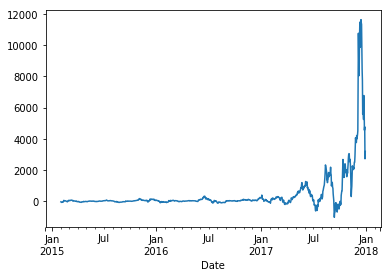

In [148]:
df_test1['Close_1'].plot()


ValueError: view limit minimum -18777448000.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001FA2B83C268> (for post_execute):


ValueError: view limit minimum -18777448000.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

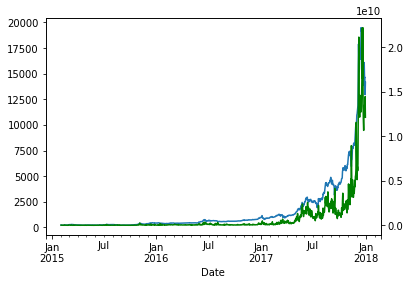

ValueError: view limit minimum -18777448000.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 2 Axes>

In [147]:
df_test1['Close'].plot()
df_test1['Volume'].plot(secondary_y=True, style = 'g')
df_test1.plot(secondary_y=['Close', 'Volume'], mark_right=False)

In [144]:
df_test1.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Close_1,Volume_1
Date,,,,,,,,,
2015-02-02,2015-02-02,226.49,242.18,222.66,238.23,30612100.0,3.123010e+09,-36.93,-14845400.0
2015-02-03,2015-02-03,237.45,245.96,224.48,227.27,40783700.0,3.275110e+09,-47.62,-17368500.0
2015-02-04,2015-02-04,227.51,230.06,221.11,226.85,26594300.0,3.138700e+09,-69.08,-729300.0
2015-02-05,2015-02-05,227.67,239.41,214.73,217.11,22516400.0,3.141730e+09,-72.07,-431500.0
2015-02-06,2015-02-06,216.92,230.51,216.23,222.27,24435300.0,2.994350e+09,-55.60,1621700.0


In [99]:
df_test1['Close'].autocorr()

0.9967401165435785

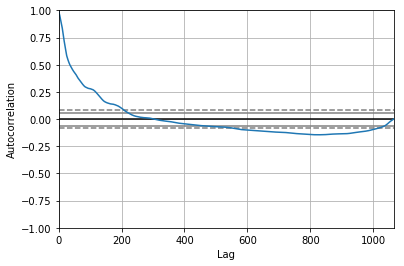

In [100]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_test1['Close'])

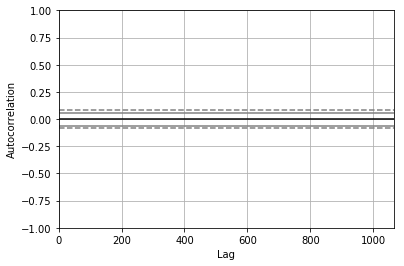

In [101]:
autocorrelation_plot(df_test1['Close_1'])

In [17]:
df_test1['Close/Exp(Close)']=df_test1['Close'].apply(lambda x:x/math.exp(x) )

OverflowError: math range error

In [250]:
df_tweets = pd.read_json('new_cleaned.json',lines=True)

In [251]:
df_tweets.drop('_id',axis=1,inplace=True)

In [252]:
df_tweets.sort_values(by='time',inplace=True)
df_tweets.reset_index(drop=True,inplace=True)

In [253]:
df_tweets.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,1 Apr 2015
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,1 Apr 2015
2,15,en,1,16,the bitshares hq designed by is looking great!,1 Apr 2015
3,1,en,,1,current price is a joke!,1 Apr 2015
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,1 Apr 2015


In [254]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32218 entries, 0 to 32217
Data columns (total 6 columns):
favorite    32218 non-null object
language    32218 non-null object
reply       32218 non-null object
retweet     32218 non-null object
text        32218 non-null object
time        32218 non-null object
dtypes: object(6)
memory usage: 1.5+ MB


In [255]:
import datetime as dt
df_tweets['time']=pd.to_datetime(df_tweets['time'])

In [256]:
df_tweets.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,2015-04-01
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,2015-04-01
2,15,en,1,16,the bitshares hq designed by is looking great!,2015-04-01
3,1,en,,1,current price is a joke!,2015-04-01
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,2015-04-01


In [257]:
df_tweets_test = df_tweets[(df_tweets['time']>dt.datetime(2014,12,31))&(df_tweets['time']<dt.datetime(2018,1,2))]

In [258]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,2015-04-01
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,2015-04-01
2,15,en,1,16,the bitshares hq designed by is looking great!,2015-04-01
3,1,en,,1,current price is a joke!,2015-04-01
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,2015-04-01


In [259]:
df_tweets_test.sort_values(by='time',inplace=True)

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
379,1,en,,,gets its first tv ads: â â€¦,2015-01-01
395,1,en,1,,tech 2015: block chain will break free from bi...,2015-01-01
394,2,en,,4,bitcoin marketing in 2015 should focus on cons...,2015-01-01
393,3,en,,2,rt : 's future lies in the billions of underba...,2015-01-01
392,1,en,,2,new post how one startup wants to reimagine bi...,2015-01-01


In [261]:
df_tweets_test.reset_index(drop=True,inplace=True)

In [262]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
0,1,en,,,gets its first tv ads: â â€¦,2015-01-01
1,1,en,1,,tech 2015: block chain will break free from bi...,2015-01-01
2,2,en,,4,bitcoin marketing in 2015 should focus on cons...,2015-01-01
3,3,en,,2,rt : 's future lies in the billions of underba...,2015-01-01
4,1,en,,2,new post how one startup wants to reimagine bi...,2015-01-01


In [263]:
df_tweets_test_text = pd.pivot_table(df_tweets_test, index=['time'],values=['text'],aggfunc=lambda x: '.'.join(x))

In [264]:
df_tweets_test_text['text']=df_tweets_test_text['text'].apply(lambda x:str(x))

In [265]:
df_tweets_test_text.head()

,text
time,
2015-01-01,gets its first tv ads: â â€¦.tech 2015: block ...
2015-01-02,isg3d sells 3d printers and offers 3d printing...
2015-01-03,we have opened vs market â wish you happy trad...
2015-01-04,i assume more tweets about bitcoin have been e...
2015-01-05,watches designed for our bitcoin family! | wat...


In [266]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [267]:
def sentence_sentiment(string):
    sent = analyser.polarity_scores(string)
    return sent

In [268]:
df_tweets_test_text['Sentiment']=df_tweets_test_text['text'].apply(sentence_sentiment)

In [269]:
df_tweets_test_text.reset_index(inplace=True)

In [270]:
df_tweets_test_text = pd.concat([df_tweets_test_text.drop(['Sentiment'], axis=1), df_tweets_test_text['Sentiment'].apply(pd.Series)], axis=1)

In [271]:
from sklearn import preprocessing

x = df_test1[['Volume']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test1=pd.concat([df_test1.drop('Volume',axis=1),pd.DataFrame(x_scaled,columns=['Volume_scaled'])],axis=1)
#df_test1['Volume_scaled'] = pd.DataFrame(x_scaled)

In [272]:
df_test1.head()

,Date,Open,High,Low,Close,Market Cap,Volume_scaled
0,2015-01-01,320.44,320.44,314.00,314.25,4.380820e+09,0.000008
1,2015-01-02,314.08,315.84,313.57,315.03,4.295210e+09,0.000000
2,2015-01-03,314.85,315.15,281.08,281.08,4.307010e+09,0.001135
3,2015-01-04,281.15,287.23,257.61,264.20,3.847150e+09,0.002153
4,2015-01-05,265.08,278.34,265.08,274.47,3.628490e+09,0.001627


In [273]:
x = df_test1[['Close']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test1=pd.concat([df_test1.drop('Close',axis=1),pd.DataFrame(x_scaled,columns=['Close_scaled'])],axis=1)

In [274]:
df_test1.drop('Open',axis=1,inplace=True)
df_test1.drop('High',axis=1,inplace=True)
df_test1.drop('Low',axis=1,inplace=True)
df_test1.drop('Market Cap',axis=1,inplace=True)

In [275]:
df_test1.head()

,Date,Volume_scaled,Close_scaled
0,2015-01-01,0.000008,0.007047
1,2015-01-02,0.000000,0.007088
2,2015-01-03,0.001135,0.005330
3,2015-01-04,0.002153,0.004457
4,2015-01-05,0.001627,0.004988


In [276]:
df_tweets_test_text.head()

,time,text,compound,neg,neu,pos
0,2015-01-01,gets its first tv ads: â â€¦.tech 2015: block ...,0.9625,0.073,0.796,0.131
1,2015-01-02,isg3d sells 3d printers and offers 3d printing...,-0.4322,0.072,0.850,0.078
2,2015-01-03,we have opened vs market â wish you happy trad...,0.9700,0.100,0.745,0.154
3,2015-01-04,i assume more tweets about bitcoin have been e...,-0.6916,0.094,0.823,0.083
4,2015-01-05,watches designed for our bitcoin family! | wat...,0.7810,0.019,0.929,0.051


In [277]:
df_tweets_test_text.columns = ['Date','Tweets','Compound','Negative','Neutral','Positive']

In [278]:
merged_data = pd.merge(left=df_test1,right=df_tweets_test_text,on='Date',how='outer')

In [279]:
merged_data.sort_values(by='Date',inplace=True)

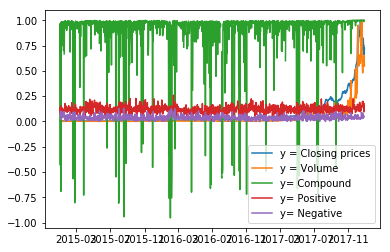

In [280]:
plt.plot(merged_data['Date'],merged_data['Close_scaled'])
plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data['Date'],merged_data['Compound'])
plt.plot(merged_data['Date'],merged_data['Positive'])
plt.plot(merged_data['Date'],merged_data['Negative'])
plt.legend(['y = Closing prices','y = Volume','y= Compound','y= Positive','y= Negative'],loc='lower right')
plt.show()

In [281]:
df_tweets_values = pd.DataFrame(df_tweets_test['time'].value_counts())

In [282]:
df_tweets_values.sort_index(inplace=True)

In [283]:
df_tweets_values.reset_index(inplace=True)
df_tweets_values.columns=['Date','count']

In [284]:
df_tweets_values.head()

,Date,count
0,2015-01-01,31
1,2015-01-02,27
2,2015-01-03,37
3,2015-01-04,30
4,2015-01-05,26


In [285]:
merged_data.head()

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,0.9625,0.073,0.796,0.131
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,-0.4322,0.072,0.850,0.078
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,0.9700,0.100,0.745,0.154
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,-0.6916,0.094,0.823,0.083
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,0.7810,0.019,0.929,0.051


In [286]:
merged_data=merged_data.merge(df_tweets_values,on='Date')

In [287]:
merged_data.head()

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,0.9625,0.073,0.796,0.131,31
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,-0.4322,0.072,0.850,0.078,27
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,0.9700,0.100,0.745,0.154,37
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,-0.6916,0.094,0.823,0.083,30
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,0.7810,0.019,0.929,0.051,26


In [288]:
merged_data['Negative']=merged_data.apply(lambda row: row['Negative']*int(row['count']),axis=1)
merged_data['Neutral']=merged_data.apply(lambda row: row['Neutral']*int(row['count']),axis=1)
merged_data['Positive']=merged_data.apply(lambda row: row['Positive']*int(row['count']),axis=1)
merged_data['Compound']=merged_data.apply(lambda row: row['Compound']*int(row['count']),axis=1)

In [289]:
merged_data.head()

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,29.8375,2.263,24.676,4.061,31
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,-11.6694,1.944,22.950,2.106,27
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,35.8900,3.700,27.565,5.698,37
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,-20.7480,2.820,24.690,2.490,30
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,20.3060,0.494,24.154,1.326,26


In [290]:
merged_data.drop(columns=['count'],inplace=True)

In [291]:
merged_data.head()

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,29.8375,2.263,24.676,4.061
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,-11.6694,1.944,22.950,2.106
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,35.8900,3.700,27.565,5.698
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,-20.7480,2.820,24.690,2.490
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,20.3060,0.494,24.154,1.326


In [292]:
x = merged_data[['Negative']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Negative_scaled'])],axis=1)
x = merged_data[['Neutral']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Netral_scaled'])],axis=1)
x = merged_data[['Positive']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Positive_scaled'])],axis=1)
x = merged_data[['Compound']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Compound_scaled'])],axis=1)

In [293]:
merged_data.drop(columns=['Compound','Negative','Neutral','Positive','Volume_scaled'], inplace=True)

In [294]:
merged_data.corr()

,Close_scaled,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled
Close_scaled,1.000000,0.359502,0.568748,0.533168,0.496943
Negative_scaled,0.359502,1.000000,0.497980,0.435546,0.267778
Netral_scaled,0.568748,0.497980,1.000000,0.761746,0.817940
Positive_scaled,0.533168,0.435546,0.761746,1.000000,0.801659
Compound_scaled,0.496943,0.267778,0.817940,0.801659,1.000000


In [295]:
merged_data.index = pd.to_datetime(merged_data.pop('Date'))

In [296]:
merged_data.head()

,Close_scaled,Tweets,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled
Date,,,,,,
2015-01-01,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,0.287475,0.266976,0.251013,0.474120
2015-01-02,0.007088,isg3d sells 3d printers and offers 3d printing...,0.246951,0.243559,0.123252,0.158384
2015-01-03,0.005330,we have opened vs market â wish you happy trad...,0.470020,0.306172,0.357992,0.520160
2015-01-04,0.004457,i assume more tweets about bitcoin have been e...,0.358232,0.267166,0.148347,0.089325
2015-01-05,0.004988,watches designed for our bitcoin family! | wat...,0.062754,0.259894,0.072278,0.401615


In [297]:
merged_data['Comp_ewma']=pd.ewma(merged_data['Compound_scaled'], span=30, freq="D")
merged_data['Posi_ewma']=pd.ewma(merged_data['Positive_scaled'], span=30, freq="D")
merged_data['Nega_ewma']=pd.ewma(merged_data['Negative_scaled'], span=30, freq="D")

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=30,freq=D,ignore_na=False,adjust=True).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=30,freq=D,ignore_na=False,adjust=True).mean()
  
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=30,freq=D,ignore_na=False,adjust=True).mean()
  This is separate from the ipykernel package so we can avoid doing imports u

In [298]:
merged_data.corr()

,Close_scaled,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled,Comp_ewma,Posi_ewma,Nega_ewma
Close_scaled,1.000000,0.359502,0.568748,0.533168,0.496943,0.877193,0.888105,0.688396
Negative_scaled,0.359502,1.000000,0.497980,0.435546,0.267778,0.320697,0.374589,0.516417
Netral_scaled,0.568748,0.497980,1.000000,0.761746,0.817940,0.609678,0.586993,0.480558
Positive_scaled,0.533168,0.435546,0.761746,1.000000,0.801659,0.573082,0.628505,0.434191
Compound_scaled,0.496943,0.267778,0.817940,0.801659,1.000000,0.596471,0.546535,0.346162
Comp_ewma,0.877193,0.320697,0.609678,0.573082,0.596471,1.000000,0.915479,0.568175
Posi_ewma,0.888105,0.374589,0.586993,0.628505,0.546535,0.915479,1.000000,0.690900
Nega_ewma,0.688396,0.516417,0.480558,0.434191,0.346162,0.568175,0.690900,1.000000


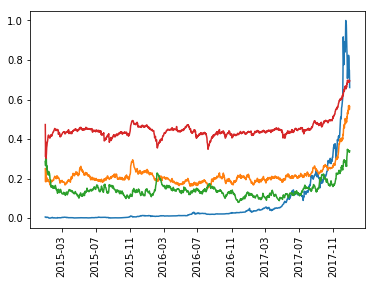

In [299]:
plt.plot(merged_data.index,merged_data['Close_scaled'])
# plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data.index,merged_data['Posi_ewma'])
plt.plot(merged_data.index,merged_data['Nega_ewma'])
plt.plot(merged_data.index,merged_data['Comp_ewma'])
# plt.plot(merged_data['Date'],merged_data['Positive_scaled'])
# plt.plot(merged_data['Date'],merged_data['Negative_scaled'])
#plt.legend(['y = Closing prices','y = Volume','y= Compound','y= Positive','y= Negative'],loc='lower right')
plt.xticks(rotation=90)
plt.show()

In [300]:
import math
def mean_test(series):    
    X=series.values
    split=math.ceil(len(X)/2)
    X1,X2 = X[0:split],X[split:]
    mean1,mean2=X1.mean(),X2.mean()
    var1,var2=X1.var(),X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))

In [301]:
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(series):
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [302]:
mean_test(merged_data['Close_scaled'])

mean1=0.008071, mean2=0.141098
variance1=0.000034, variance2=0.035731


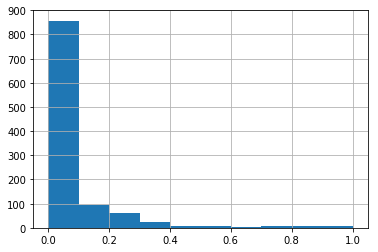

In [303]:
merged_data['Close_scaled'].hist()

In [304]:
merged_data.head()

,Close_scaled,Tweets,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled,Comp_ewma,Posi_ewma,Nega_ewma
Date,,,,,,,,,
2015-01-01,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,0.287475,0.266976,0.251013,0.474120,0.474120,0.251013,0.287475
2015-01-02,0.007088,isg3d sells 3d printers and offers 3d printing...,0.246951,0.243559,0.123252,0.158384,0.310990,0.185003,0.266538
2015-01-03,0.005330,we have opened vs market â wish you happy trad...,0.470020,0.306172,0.357992,0.520160,0.385411,0.246552,0.338936
2015-01-04,0.004457,i assume more tweets about bitcoin have been e...,0.358232,0.267166,0.148347,0.089325,0.303829,0.219493,0.344252
2015-01-05,0.004988,watches designed for our bitcoin family! | wat...,0.062754,0.259894,0.072278,0.401615,0.326078,0.185998,0.280205


In [306]:
merged_data['Close_pct_change']=merged_data['Close_scaled'].pct_change()
merged_data['Comp_pct_change']=merged_data['Compound_scaled'].pct_change()
merged_data['Nega_pct_change']=merged_data['Negative_scaled'].pct_change()
merged_data['Posi_pct_change']=merged_data['Positive_scaled'].pct_change()
merged_data.drop(columns=['Close_scaled','Negative_scaled','Netral_scaled','Compound_scaled','Positive_scaled'],inplace=True)

In [307]:
merged_data.head()

,Tweets,Comp_ewma,Posi_ewma,Nega_ewma,Close_pct_change,Comp_pct_change,Nega_pct_change,Posi_pct_change
Date,,,,,,,,
2015-01-01,gets its first tv ads: â â€¦.tech 2015: block ...,0.474120,0.251013,0.287475,NaN,NaN,NaN,NaN
2015-01-02,isg3d sells 3d printers and offers 3d printing...,0.310990,0.185003,0.266538,0.005729,-0.665940,-0.140963,-0.508982
2015-01-03,we have opened vs market â wish you happy trad...,0.385411,0.246552,0.338936,-0.247937,2.284160,0.903292,1.904560
2015-01-04,i assume more tweets about bitcoin have been e...,0.303829,0.219493,0.344252,-0.163915,-0.828273,-0.237838,-0.585615
2015-01-05,watches designed for our bitcoin family! | wat...,0.326078,0.185998,0.280205,0.119280,3.496100,-0.824823,-0.512775


In [308]:
merged_data=merged_data[1:]

In [316]:
merged_data

,Tweets,Comp_ewma,Posi_ewma,Nega_ewma,Close_pct_change,Comp_pct_change,Nega_pct_change,Posi_pct_change,ewma_close_pct_change
Date,,,,,,,,,
2015-01-02,isg3d sells 3d printers and offers 3d printing...,0.310990,0.185003,0.266538,0.005729,-0.665940,-0.140963,-0.508982,0.005729
2015-01-03,we have opened vs market â wish you happy trad...,0.385411,0.246552,0.338936,-0.247937,2.284160,0.903292,1.904560,-0.125332
2015-01-04,i assume more tweets about bitcoin have been e...,0.303829,0.219493,0.344252,-0.163915,-0.828273,-0.237838,-0.585615,-0.139060
2015-01-05,watches designed for our bitcoin family! | wat...,0.326078,0.185998,0.280205,0.119280,3.496100,-0.824823,-0.512775,-0.067878
2015-01-06,keeping score at the 2014 bitcoin bowl: by chr...,0.357582,0.195891,0.246859,0.121615,0.212884,0.748988,2.273056,-0.024764
2015-01-07,together! never change a winning team!.don't m...,0.368017,0.197163,0.265463,0.075400,-0.142054,2.229167,-0.140884,-0.005168
2015-01-08,mining now! ~14 days left for pow add a pool t...,0.383028,0.204076,0.246459,-0.094546,0.110794,-0.594624,0.188103,-0.020627
2015-01-09,shooting commercial video for stories from the...,0.389007,0.190822,0.229169,0.067078,-0.084799,-0.126437,-0.538836,-0.006941
2015-01-10,"banksâ€¦ most subsidized industry in us, also ...",0.399783,0.188328,0.227502,-0.138990,0.106967,0.725709,0.544601,-0.025818


In [310]:
mean_test(merged_data['Close_pct_change'])

mean1=0.007341, mean2=0.007221
variance1=0.009574, variance2=0.002142


In [311]:
dickey_fuller(merged_data['Close_pct_change'])

ADF Statistic: -13.629758
p-value: 0.000000
Critical Values:
	5%: -2.864
	10%: -2.568
	1%: -3.436


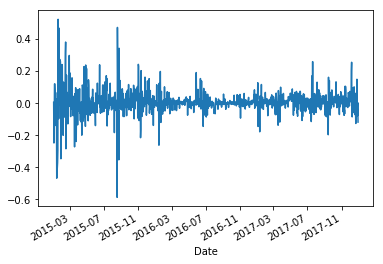

In [312]:
merged_data['Close_pct_change'].plot()

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=30,freq=D,ignore_na=False,adjust=True).mean()
  """Entry point for launching an IPython kernel.


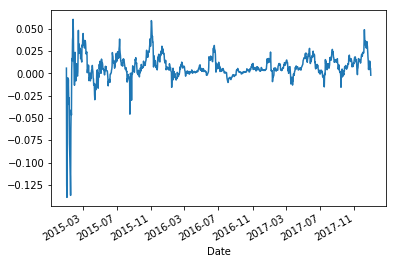

In [313]:
merged_data['ewma_close_pct_change']=pd.ewma(merged_data['Close_pct_change'],span=30,freq='D')
merged_data['ewma_close_pct_change'].plot()

In [317]:
merged_data.dropna(how='any')

,Tweets,Comp_ewma,Posi_ewma,Nega_ewma,Close_pct_change,Comp_pct_change,Nega_pct_change,Posi_pct_change,ewma_close_pct_change
Date,,,,,,,,,
2015-01-02,isg3d sells 3d printers and offers 3d printing...,0.310990,0.185003,0.266538,0.005729,-0.665940,-0.140963,-0.508982,0.005729
2015-01-03,we have opened vs market â wish you happy trad...,0.385411,0.246552,0.338936,-0.247937,2.284160,0.903292,1.904560,-0.125332
2015-01-04,i assume more tweets about bitcoin have been e...,0.303829,0.219493,0.344252,-0.163915,-0.828273,-0.237838,-0.585615,-0.139060
2015-01-05,watches designed for our bitcoin family! | wat...,0.326078,0.185998,0.280205,0.119280,3.496100,-0.824823,-0.512775,-0.067878
2015-01-06,keeping score at the 2014 bitcoin bowl: by chr...,0.357582,0.195891,0.246859,0.121615,0.212884,0.748988,2.273056,-0.024764
2015-01-07,together! never change a winning team!.don't m...,0.368017,0.197163,0.265463,0.075400,-0.142054,2.229167,-0.140884,-0.005168
2015-01-08,mining now! ~14 days left for pow add a pool t...,0.383028,0.204076,0.246459,-0.094546,0.110794,-0.594624,0.188103,-0.020627
2015-01-09,shooting commercial video for stories from the...,0.389007,0.190822,0.229169,0.067078,-0.084799,-0.126437,-0.538836,-0.006941
2015-01-10,"banksâ€¦ most subsidized industry in us, also ...",0.399783,0.188328,0.227502,-0.138990,0.106967,0.725709,0.544601,-0.025818


In [354]:
import numpy as np
merged_data['Nega_pct_change'].replace([np.inf, -np.inf], 0,inplace=True)
merged_data['Posi_pct_change'].replace([np.inf, -np.inf], 0,inplace=True)

In [355]:
merged_data[merged_data['Nega_pct_change']==np.inf]

,Tweets,Comp_ewma,Posi_ewma,Nega_ewma,Close_pct_change,Comp_pct_change,Nega_pct_change,Posi_pct_change,ewma_close_pct_change
Date,,,,,,,,,


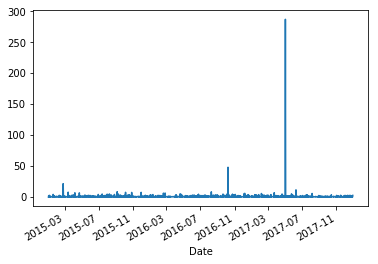

In [356]:
merged_data['Posi_pct_change'].plot()

In [357]:
mean_test(merged_data['Posi_pct_change'])

mean1=0.445833, mean2=1.034187
variance1=2.592749, variance2=158.375290


In [359]:
dickey_fuller(merged_data['Posi_pct_change'])

ADF Statistic: -33.457549
p-value: 0.000000
Critical Values:
	5%: -2.864
	10%: -2.568
	1%: -3.436


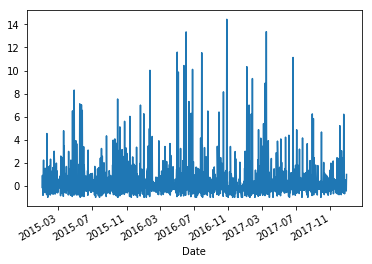

In [360]:
merged_data['Nega_pct_change'].plot()

In [361]:
merged_data['Ewma_Posi_pct_change']=pd.ewma(merged_data['Posi_pct_change'],span=60,freq='D')
merged_data['Ewma_Nega_pct_change']=pd.ewma(merged_data['Nega_pct_change'],span=60,freq='D')

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=60,freq=D,ignore_na=False,adjust=True).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=60,freq=D,ignore_na=False,adjust=True).mean()
  


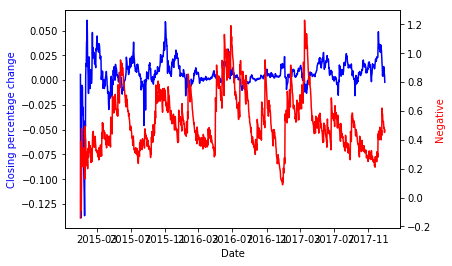

In [363]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing percentage change',color='blue')
ax1.plot(merged_data.index,merged_data['ewma_close_pct_change'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Negative', color = "red")
ax2.plot(merged_data.index,merged_data['Ewma_Nega_pct_change'],color='red')
plt.show()

In [365]:
merged_data=merged_data[['Ewma_Posi_pct_change','Ewma_Nega_pct_change','ewma_close_pct_change']]

In [366]:
merged_data.to_json('Final_for_ppt.json')

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
merged_data1=merged_data[merged_data.index>dt.datetime(2015,2,1)]

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Log Closing Price Change',color='blue')
ax1.plot(merged_data1.index,merged_data1['ewma_close_pct_change'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Log sentiment', color = "red")
ax2.plot(merged_data1.index,merged_data1['ewma_sent_pct'],color='red')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests()

In [ ]:
merged_data['Pct_change_ewma']=pd.ewma(merged_data['Close_pct_change'],span=120,freq='D')

In [ ]:
merged_data['Log_comp_ewma']=pd.ewma(merged_data['Log_comp'],span=30,freq='D')

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Log Closing Price Change',color='blue')
ax1.plot(merged_data.index,merged_data['Pct_change_ewma'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Log sentiment', color = "red")
ax2.plot(merged_data.index,merged_data['Log_comp_ewma'],color='red')
plt.show()

In [ ]:
plt.plot(merged_data.index,merged_data['Close_scaled'])
# plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data.index,merged_data['Negative_scaled'])
# plt.plot(merged_data['Date'],merged_data['Positive_scaled'])
# plt.plot(merged_data['Date'],merged_data['Negative_scaled'])
plt.legend(['Closing prices','Compound'],loc='upper right')#,'Positive','Negative'
plt.xticks(rotation=90)
plt.show()

In [ ]:
from pandas.plotting import lag_plot

In [ ]:
lag_plot(merged_data['Compound_scaled'])

In [ ]:
lag_plot(merged_data['Close_scaled'])

In [ ]:
merged_data['Tweets']

In [ ]:
merged_data=merged_data[merged_data.index>dt.datetime(2015,2,1)]

In [ ]:

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [ ]:
tsplot(merged_data['ewma_close_pct_change'],lags=120)

In [ ]:
tsplot(merged_data['ewma_sent_pct'],lags=60)

In [ ]:
sent_diff=merged_data.ewma_sent_pct-merged_data.ewma_sent_pct.shift(150)
tsplot(sent_diff[150:],lags=120)

In [ ]:
sent_diff= sent_diff - sent_diff.shift(1)
tsplot(sent_diff[150+1:],lags=120)